

1.   download url

* extract all files
* read to df
2. drop non required cols (inplace = true)
3. train test split
4. identify inputs and targets (price_doc)
*  save a copy afterwords
5. identify numeric and categorical
6. impute scale and encode








In [ ]:
!pip install pandas numpy xgboost scikit-learn opendatasets --quiet

In [ ]:
import pandas as pd
import numpy as np
import os
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:

url = 'https://www.kaggle.com/c/sberbank-russian-housing-market'
od.download(url)

Skipping, found downloaded files in "./sberbank-russian-housing-market" (use force=True to force download)


In [ ]:
os.listdir('sberbank-russian-housing-market')

['macro.csv.zip',
 'sample_submission.csv.zip',
 'train.csv.zip',
 'data_dictionary.txt',
 'test.csv.zip']

In [ ]:
from zipfile import ZipFile
with ZipFile('sberbank-russian-housing-market/test.csv.zip', 'r') as f:
  f.extractall()

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
macro_df = pd.read_csv('macro.csv')
sample_submission_df = pd.read_csv('sample_submission.csv')

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
train_merged = train_df.merge(macro_df, on='timestamp')
test_merged = test_df.merge(macro_df, on='timestamp')

In [ ]:
cols_to_be_removed = ['build_year', 'state', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg',
                      'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'load_of_teachers_preschool_per_teacher',
                      'provision_retail_space_sqm', 'provision_retail_space_modern_sqm', 'theaters_viewers_per_1000_cap',
                      'museum_visitis_per_100_cap', 'students_reg_sports_share', 'id', 'timestamp']

In [ ]:
train_merged.drop(cols_to_be_removed, inplace = True, axis = 1)
test_merged.drop(cols_to_be_removed, inplace = True, axis = 1)

In [ ]:
pd.set_option('display.max_rows', None)
train_merged.isna().sum()

full_sq                                          0
life_sq                                       6383
floor                                          167
max_floor                                     9572
material                                      9572
num_room                                      9572
kitch_sq                                      9572
product_type                                     0
sub_area                                         0
area_m                                           0
raion_popul                                      0
green_zone_part                                  0
indust_part                                      0
children_preschool                               0
preschool_quota                               6688
preschool_education_centers_raion                0
children_school                                  0
school_quota                                  6685
school_education_centers_raion                   0
school_education_centers_top_20

In [ ]:
pd.set_option('display.max_rows', 120)
train_merged

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,43,27.0,4.0,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,211.0,0.0,...,131.16,204.78,10618898,0.009740,4.10,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.10,5.1,6.2,10.80,9.70,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
1,34,19.0,3.0,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,7593,13729,6929,6800,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,0.0,244.0,1.0,...,131.45,204.92,10618898,0.009740,4.10,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.00

In [ ]:
test_merged

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,39.00,20.7,2,9,1,1,8.9,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,no,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,18677,14080,7457,6623,14892,7839,7053,34341,18094,16247,19906,9676,10230,27123,14340,12783,1681.0,173.0,607.0,19.0,245.0,116.0,431.0,1.0,84.0,5.0,1680.0,34.0,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.511527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.66,NaN,NaN,11.55,9.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.77,NaN,NaN,NaN,211.83,115.64,77.49,52.36,49.35,39.62,30.98,NaN,1573.650623,97.8484,"95,4918","8,2517",NaN,90.8,6899.930464,NaN,NaN,NaN,10805.0,0.45888,463938.0,NaN,NaN,234576.9
1,79.20,NaN,8,17,1,3,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,17790,8350,9443,574,297,277,2566,1356,1211,861,244,617,275,143,133,264,136,128,646,336,311,3796,2035,1762,506,261,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.5

In [ ]:
target = 'price_doc'
X_inputs = train_merged.drop(target, axis = 1)
X_target = train_merged[target]

In [ ]:
X_inputs

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,43,27.0,4.0,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0,211.0,0.0,...,131.16,204.78,10618898,0.009740,4.10,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.005,44898.7,0.168917,12838.36,3322.0470,286.952000,106.6,6643.626000,0.014000,0.708000,73976.19863,856.424079,0.708,0.292,0.891478,53636.0,226.214157,8.5,3.8,549075.8,106.6,1.10,5.1,6.2,10.80,9.70,218.0,18.772066,99.9,99.8,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,6943.0,0.45356,269768.0,22.37,23587.0,230310.0
1,34,19.0,3.0,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,7593,13729,6929,6800,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,0.0,244.0,1.0,...,131.45,204.92,10618898,0.009740,4.10,323275,1.051914,11.84,9948.7728,0.187791,42688.6,-0.00

In [ ]:
X_target

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

In [ ]:
test_merged

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,39.00,20.7,2,9,1,1,8.9,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,no,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,18677,14080,7457,6623,14892,7839,7053,34341,18094,16247,19906,9676,10230,27123,14340,12783,1681.0,173.0,607.0,19.0,245.0,116.0,431.0,1.0,84.0,5.0,1680.0,34.0,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.511527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.66,NaN,NaN,11.55,9.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.77,NaN,NaN,NaN,211.83,115.64,77.49,52.36,49.35,39.62,30.98,NaN,1573.650623,97.8484,"95,4918","8,2517",NaN,90.8,6899.930464,NaN,NaN,NaN,10805.0,0.45888,463938.0,NaN,NaN,234576.9
1,79.20,NaN,8,17,1,3,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,17790,8350,9443,574,297,277,2566,1356,1211,861,244,617,275,143,133,264,136,128,646,336,311,3796,2035,1762,506,261,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.5

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_price, val_price, X_target, val_target = train_test_split(X_inputs, X_target, test_size = 0.2, random_state = 42)

In [ ]:
X_prices = X_price.copy()
val_prices = val_price.copy()
test_prices = test_merged.copy()

In [ ]:
X_prices

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
12761,46,NaN,4.0,1.0,1.0,1.0,1.0,OwnerOccupier,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,247469,112902,134567,3459,1782,1677,13331,6670,6661,3150,948,2202,1706,862,844,1564,821,743,3831,1973,1858,55710,27242,28468,3112,1600,1512,43.0,3.0,0.0,0.0,10.0,2.0,28.0,0.0,0.0,0.0,41.0,0.0,...,132.02,229.17,16260794,0.012373,5.10,1160728,0.296714,11.93,11814.8974,0.107625,88547.9,0.054,55485.2,0.136284,15417.34,4016.9869,333.529000,103.5,6879.314000,0.017000,0.718000,117328.6496,1413.093702,0.685,0.315,0.969794,84183.0,198.004708,8.0,3.8,674276.8,107.1,1.70,9.0,10.7,11.30,9.60,233.0,19.243475,98.8,98.6,98.0,43.6,94.3,54.5,99.3,0.4,76.37,7.6,8.82,684.2,142.39,86.81,71.20,56.60,48.50,42.00,33.97,"3,013",1437.739554,100.0000,"90,92","23,14",65.2,97.9,8846.956102,121.1,772.0,293.0,9350.0,0.43939,329348.0,26.70,46352.0,226047.3
27371,134,NaN,2.0,2.0,5.0,3.0,1.0,OwnerOccupier,Poselenie Rogovskoe,1.762464e+08,2693,0.649578,0.004949,189,NaN,0,186,NaN,0,0,0,0,0,0,no,0,0,0,no,no,no,no,no,no,no,no,6161,3033,3130,399,204,195,1677,889,788,617,171,447,189,97,92,186,94,92,445,228,217,1537,941,596,352,181,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.50,236.36,18552682,0.025742,12.33,1753294,0.309669,13.17,NaN,NaN,39156.0,NaN,64310.0,0.050680,17817.40,4310.1067,351.447778,82.8

In [ ]:
val_prices

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
4739,80,80.0,13.0,NaN,NaN,NaN,NaN,OwnerOccupier,Strogino,1.675112e+07,155427,0.338151,0.041125,9254,4606.0,8,9515,11032.0,9,0,1,0,6,2,no,0,10,5,no,no,no,no,no,no,no,yes,156377,71846,84531,20003,10461,9542,97920,53042,44878,37504,12102,25402,9254,4856,4398,9515,4991,4524,22087,11541,10546,32847,16042,16805,17622,9249,8373,453.0,14.0,161.0,25.0,73.0,9.0,160.0,0.0,11.0,0.0,453.0,47.0,...,134.55,220.64,13196495,0.010637,6.00,791792,0.518213,12.44,10666.8705,0.072180,51261.0,-0.025,48830.4,0.087568,13872.82,3639.7151,305.395,101.7,6799.974,0.008,0.716,102373.8183,1220.096592,0.702,0.298,0.942097,47563.0,249.283806,7.8,3.6,609729.3,133.1,1.4,8.9,10.3,11.3,9.9,231.0,19.282137,98.8,98.6,98.0,44.1,94.4,54.1,99.3,0.4,75.74,8.1,10.20,698.6,163.06,90.97,70.37,51.74,48.97,40.83,32.93,"7,311",1453.830605,99.2666,NaN,NaN,66.1,96.5,8296.038659,156.3,836.0,298.0,8522.0,0.45070,288177.0,23.01,42551.0,232840.2
26793,44,27.0,7.0,9.0,1.0,2.0,6.0,Investment,Beskudnikovskoe,3.292112e+06,73148,0.063747,0.092291,4449,2757.0,5,4346,7327.0,5,0,1,0,3,2,no,0,2,2,no,no,no,no,no,no,no,no,41504,18905,22599,9308,4847,4461,44449,22170,22279,19391,5955,13436,4449,2281,2168,4346,2283,2063,10271,5360,4911,9620,4575,5045,8322,4322,4000,222.0,97.0,0.0,0.0,4.0,13.0,108.0,0.0,0.0,0.0,222.0,0.0,...,104.97,236.50,18087076,0.022713,12.29,1528991,0.317269,12.62,12808.5734,0.084104,8925

In [ ]:
test_prices

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,...,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
0,39.00,20.7,2,9,1,1,8.9,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,no,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,18677,14080,7457,6623,14892,7839,7053,34341,18094,16247,19906,9676,10230,27123,14340,12783,1681.0,173.0,607.0,19.0,245.0,116.0,431.0,1.0,84.0,5.0,1680.0,34.0,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.511527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.66,NaN,NaN,11.55,9.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.77,NaN,NaN,NaN,211.83,115.64,77.49,52.36,49.35,39.62,30.98,NaN,1573.650623,97.8484,"95,4918","8,2517",NaN,90.8,6899.930464,NaN,NaN,NaN,10805.0,0.45888,463938.0,NaN,NaN,234576.9
1,79.20,NaN,8,17,1,3,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,17790,8350,9443,574,297,277,2566,1356,1211,861,244,617,275,143,133,264,136,128,646,336,311,3796,2035,1762,506,261,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.73,267.70,19892300,0.026267,8.74,458999,-0.400792,13.29,NaN,NaN,63194.0,NaN,64310.0,0.05068,19156.19,4310.1067,351.447778,82.8,7067.470079,0.017708,0.733598,131403.0,1611.5

In [ ]:
numeric_cols = X_prices.select_dtypes(include = 'number').columns
categorical_cols = X_prices.select_dtypes(include = 'object').columns

In [ ]:
X_prices[categorical_cols]

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
12761,OwnerOccupier,Nekrasovka,no,no,yes,no,no,no,no,no,no,no,no,no,good,"3,013","90,92","23,14"
27371,OwnerOccupier,Poselenie Rogovskoe,no,no,no,no,no,no,no,no,no,no,yes,no,no data,NaN,"95,4918","8,2517"
19862,Investment,Zjuzino,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory,"16,765","93,08","25,47"
4157,Investment,Chertanovo Juzhnoe,no,no,no,no,no,no,no,no,no,no,no,no,poor,"7,311",NaN,NaN
2559,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,yes,good,"7,311",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
5390,OwnerOccupier,Nekrasovka,no,no,yes,no,no,no,no,no,no,no,no,no,good,"7,311",NaN,NaN
860,Investment,Vyhino-Zhulebino,no,no,no,no,yes,no,no,no,no,no,no,no,poor,"7,311",NaN,NaN
15795,OwnerOccupier,Nekrasovka,no,no,yes,no,no,no,no,no,no,no,no,no,good,"16,765","93,08","25,47"


In [ ]:
val_prices[categorical_cols]

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
4739,OwnerOccupier,Strogino,no,no,no,no,no,no,no,no,yes,no,no,no,good,"7,311",NaN,NaN
26793,Investment,Beskudnikovskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor,"16,765","93,08","25,47"
6983,Investment,Birjulevo Vostochnoe,no,no,no,no,yes,no,no,no,no,no,no,no,poor,"3,013","90,92","23,14"
11307,Investment,Bogorodskoe,no,no,no,no,yes,no,no,no,no,no,no,no,poor,"3,013","90,92","23,14"
20974,Investment,Babushkinskoe,no,no,no,no,no,no,no,no,yes,no,no,no,good,"16,765","93,08","25,47"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8505,OwnerOccupier,Nekrasovka,no,no,yes,no,no,no,no,no,no,no,no,no,good,"3,013","90,92","23,14"
17816,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory,"16,765","93,08","25,47"
1192,Investment,Krjukovo,no,no,no,no,no,no,no,no,no,no,no,no,no data,"7,311",NaN,NaN
12193,Investment,Pechatniki,no,no,no,no,yes,no,no,no,yes,no,no,no,excellent,"3,013","90,92","23,14"


In [ ]:
test_prices[categorical_cols]

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,child_on_acc_pre_school,modern_education_share,old_education_build_share
0,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory,NaN,"95,4918","8,2517"
1,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
2,Investment,Perovo,no,yes,no,yes,yes,no,no,no,no,no,no,no,poor,NaN,"95,4918","8,2517"
3,OwnerOccupier,Poselenie Voskresenskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
4,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,"95,4918","8,2517"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Investment,Kon'kovo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory,NaN,NaN,NaN
7658,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data,NaN,NaN,NaN
7659,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent,NaN,NaN,NaN
7660,Investment,Orehovo-Borisovo Juzhnoe,no,no,no,no,no,no,yes,no,no,no,no,no,poor,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
imputer = SimpleImputer(strategy = 'mean').fit(X_prices[numeric_cols])
X_prices[numeric_cols] = imputer.transform(X_prices[numeric_cols])
val_prices[numeric_cols] = imputer.transform(val_prices[numeric_cols])
test_prices[numeric_cols] = imputer.transform(test_prices[numeric_cols])

In [ ]:
scaler = MinMaxScaler().fit(X_prices[numeric_cols])
X_prices[numeric_cols] = scaler.transform(X_prices[numeric_cols])
val_prices[numeric_cols] = scaler.transform(val_prices[numeric_cols])
test_prices[numeric_cols] = scaler.transform(test_prices[numeric_cols])

In [ ]:
test_prices[numeric_cols].describe()

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,...,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,...,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7.662000e+03,7662.000000,7.662000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7.662000e+03,7662.000000,7662.000000,7.662000e+03,7662.000000,7662.000000,7.662000e+03,7662.000000,7662.000000,7662.000000,7662.0

In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').fit(X_prices[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X_prices[encoded_cols] = encoder.transform(X_prices[categorical_cols])
X_prices.drop(categorical_cols, axis = 1, inplace = True)
val_prices[encoded_cols] = encoder.transform(val_prices[categorical_cols])
val_prices.drop(categorical_cols, axis = 1, inplace = True)
test_prices[encoded_cols] = encoder.transform(test_prices[categorical_cols])
test_prices.drop(categorical_cols, axis = 1, inplace = True)

<ipython-input-33-12328505af03>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_prices[encoded_cols] = encoder.transform(X_prices[categorical_cols])
<ipython-input-33-12328505af03>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_prices[encoded_cols] = encoder.transform(X_prices[categorical_cols])
<ipython-input-33-12328505af03>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

In [ ]:
type(X_prices[encoded_cols])

pandas.core.frame.DataFrame

In [ ]:
# Combine the column names correctly, ensuring both lists are of the same length
all_cols = numeric_cols.tolist() + encoded_cols
X_prices[all_cols]


,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,...,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Silino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Staroe Krjukovo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troickij okrug,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,child_on_acc_pre_school_#!,"child_on_acc_pre_school_16,765","child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",child_on_acc_pre_school_nan,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",modern_education_share_nan,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517",old_education_build_share_nan
12761,0.008637,0.004627,0.051948,0.008547,0.000000,0.058824,0.000497,0.045640,0.071018,0.063174,0.466028,0.080376,0.200822,0.384615,0.073804,0.268135,0.357143,0.0,0.000000,0.000000,0.000000,0.2500,0.0,0.000000,0.000000,0.142880,0.144424,0.141609,0.076723,0.076631,0.076773,0.073270,0.073731,0.072809,0.046022,0.041425,0.048346,0.080376,0.077910,0.082942,0.073804,0.075873,0.071537,0.076409,0.076415,0.076360,0.150197,0.156003,0.145103,0.078123,0.077901,0.078359,0.025000,0.013453,0.000000,0.000000,0.015060,0.015748,0.064965,0.000000,0.000000,0.000000,0.023824,0.000000,0.002618,0.008284,0.040650,0.028786,0.481982,0.076842,0.050421,0.063725,0.063725,0.009841,0.004519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27371,0.025160,0.004627,0.025974,0.017094,0.800000,0.176471,0.000497,0.853790,0.000600,0.761064,0.0

In [ ]:
val_prices[all_cols]

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,...,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Silino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Staroe Krjukovo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troickij okrug,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,child_on_acc_pre_school_#!,"child_on_acc_pre_school_16,765","child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",child_on_acc_pre_school_nan,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",modern_education_share_nan,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517",old_education_build_share_nan
4739,0.015021,0.010698,0.168831,0.107502,0.165432,0.112565,0.003241,0.071913,0.624200,0.395129,0.078803,0.476638,0.386215,0.615385,0.494158,0.422108,0.642857,0.0,0.166667,0.0,0.206897,0.1250,0.0,0.434783,0.035461,0.089740,0.091337,0.088424,0.486969,0.494131,0.479322,0.603087,0.662515,0.545224,0.653649,0.624823,0.668368,0.476638,0.481508,0.471315,0.494158,0.506926,0.480736,0.484282,0.492072,0.476011,0.087914,0.091132,0.085123,0.484417,0.493427,0.474834,0.269048,0.062780,0.203026,0.257732,0.109940,0.070866,0.371230,0.000000,0.130952,0.000000,0.269208,0.126685,0.109948,0.117160,0.711382,0.112641,0.117117,0.025787,0.016522,0.020881,0.020881,0.033134,0.009931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
26793,0.008261,0.003611,0.090909,0.076923,0.000000,0.117647,0.002979,0.005934,0.288262,0.072696,0.176847,

In [ ]:
test_prices[all_cols]

,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,...,sub_area_Savelovskoe,sub_area_Severnoe,sub_area_Severnoe Butovo,sub_area_Severnoe Izmajlovo,sub_area_Severnoe Medvedkovo,sub_area_Severnoe Tushino,sub_area_Shhukino,sub_area_Silino,sub_area_Sokol,sub_area_Sokol'niki,sub_area_Sokolinaja Gora,sub_area_Solncevo,sub_area_Staroe Krjukovo,sub_area_Strogino,sub_area_Sviblovo,sub_area_Taganskoe,sub_area_Tekstil'shhiki,sub_area_Teplyj Stan,sub_area_Timirjazevskoe,sub_area_Troickij okrug,sub_area_Troparevo-Nikulino,sub_area_Tverskoe,sub_area_Veshnjaki,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino,culture_objects_top_25_no,culture_objects_top_25_yes,thermal_power_plant_raion_no,thermal_power_plant_raion_yes,incineration_raion_no,incineration_raion_yes,oil_chemistry_raion_no,oil_chemistry_raion_yes,radiation_raion_no,radiation_raion_yes,railroad_terminal_raion_no,railroad_terminal_raion_yes,big_market_raion_no,big_market_raion_yes,nuclear_reactor_raion_no,nuclear_reactor_raion_yes,detention_facility_raion_no,detention_facility_raion_yes,water_1line_no,water_1line_yes,big_road1_1line_no,big_road1_1line_yes,railroad_1line_no,railroad_1line_yes,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,child_on_acc_pre_school_#!,"child_on_acc_pre_school_16,765","child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",child_on_acc_pre_school_nan,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",modern_education_share_nan,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517",old_education_build_share_nan
0,0.007323,0.002768,0.025974,0.076923,0.0,0.058824,0.004419,0.118013,0.717442,0.159765,0.078787,0.729998,1.000000,0.846154,0.778430,1.000000,0.928571,0.5,0.166667,0.000000,0.448276,0.2500,0.0,0.173913,0.028369,0.058379,0.060091,0.056968,0.754904,0.772657,0.736002,0.749958,0.739915,0.759732,0.451714,0.379413,0.488642,0.729998,0.744341,0.714457,0.778430,0.801323,0.754437,0.758060,0.776750,0.738258,0.052661,0.054260,0.051309,0.750455,0.769991,0.729674,1.000000,0.775785,0.765448,0.195876,0.368976,0.913386,1.000000,0.090909,1.000000,0.555556,1.000000,0.091644,0.782723,0.519527,0.443089,1.000000,0.198198,0.020491,0.009824,0.012417,0.012417,0.002683,0.015760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.014870,0.004627,0.103896,0.145299,0.0,0.176471,0.000497,0.114979,0.005941,0.580976,0.013648,0.005250,0.2

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge().fit(X_prices[all_cols], X_target)

In [ ]:
model.predict(X_prices[all_cols])

array([2366898.00124347, 7460785.79447512, 7397147.76175244, ...,
       5095181.95428518, 5797554.96108707, 2680444.30748566])

In [ ]:
test_preds = model.predict(test_prices[all_cols])

In [ ]:
data_dir = 'sberbank-russian-housing-market'

In [ ]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv('sample_submission.csv')
    sub_df['price_doc'] = test_preds
    sub_df.to_csv(fname, index=None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_jobs = -1, random_state = 27).fit(X_prices[all_cols], X_target)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(train, target):
  return mean_squared_error(train, target, squared=False)

In [ ]:
X_preedict = rf_model.predict(X_prices[all_cols])
val_predict = rf_model.predict(val_prices[all_cols])

In [ ]:
train_rmse = rmse(X_preedict, X_target)
val_rmse = rmse(val_predict, val_target)
print('train rmse is : {}, val rmse is: {}'.format(train_rmse, val_rmse))

train rmse is : 1012817.430735639, val rmse is: 2544309.87893201


In [ ]:
def test_params(**params):
  model = RandomForestRegressor(n_jobs = -1, random_state = 27, **params).fit(X_prices[all_cols], X_target)
  train_rmse = rmse(model.predict(X_prices[all_cols]), X_target)
  val_rmse = rmse(model.predict(val_prices[all_cols]), val_target)
  train_acc = model.score(X_prices[all_cols], X_target)
  val_acc = model.score(val_prices[all_cols], val_target)

  print('train rmse is: {}, val rmse is: {}, train acc is : {}, val acc is : {}'.format(train_rmse, val_rmse, train_acc, val_acc))
  return train_rmse, val_rmse, train_acc, val_acc

In [ ]:
test_params(n_estimators = 10)

KeyboardInterrupt: 

In [ ]:
test_params(n_estimators = 50)

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        # Capture all 4 returned values
        train_rmse, val_rmse, _, _ = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot('n_estimators', [20, 30, 40, 50, 60])

In [ ]:
test_param_and_plot('max_depth', range(5, 100, 10))

In [ ]:
test_param_and_plot('max_depth', [150, 250])

In [ ]:
test_params(max_depth = 100, n_estimators = 50, min_samples_leaf = 15, max_features = 0.4, bootstrap = False, min_impurity_decrease = 1e-4)

In [ ]:
test_param_and_plot('min_impurity_decrease', [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])

In [ ]:
test_params(max_depth = 100, n_estimators = 50, min_samples_leaf = 15, max_features = 0.4, bootstrap = False, min_impurity_decrease = 0.5)

In [ ]:
rf_model.feature_importances_

In [ ]:
imp_df = pd.DataFrame({'feature': all_cols, 'importance': rf_model.feature_importances_})
imp_df.sort_values('importance', ascending = False)

In [ ]:
  imp_df.head(15)

In [ ]:
rf_score = rf_model.predict(test_prices[all_cols])

In [ ]:
generate_submission(rf_score, 'rf_submission.csv')

ab xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_model = XGBRegressor(n_jobs = -1, random_state = 27).fit(X_prices[all_cols], X_target)

In [ ]:
xg_model.score(X_prices[all_cols], X_target)

0.9218097978170089

In [ ]:
xg_model.score(val_prices[all_cols], val_target)

0.6620218968332156

In [ ]:
def test_params_xgb(**params):
  model = XGBRegressor(n_jobs = -1, random_state = 27, **params).fit(X_prices[all_cols], X_target)
  train_rmse = rmse(model.predict(X_prices[all_cols]), X_target)
  val_rmse = rmse(model.predict(val_prices[all_cols]), val_target)
  train_acc = model.score(X_prices[all_cols], X_target)
  val_acc = model.score(val_prices[all_cols], val_target)

  print('train rmse is: {}, val rmse is: {}, train acc is : {}, val acc is : {}'.format(train_rmse, val_rmse, train_acc, val_acc))
  return train_rmse, val_rmse, train_acc, val_acc

In [ ]:
test_params_xgb(n_estimators = 100)

train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


(1347083.2052121446,
 2689436.0443302183,
 0.9218097978170089,
 0.6620218968332156)

In [ ]:
test_params_xgb(max_depth = 10)

train rmse is: 301688.23606192606, val rmse is: 2656471.6387683568, train acc is : 0.9960782469366654, val acc is : 0.6702563132479364


(301688.23606192606,
 2656471.6387683568,
 0.9960782469366654,
 0.6702563132479364)

In [ ]:
test_params_xgb(max_depth = 15)

In [ ]:
test_params_xgb(learning_rate = 0.2)

In [ ]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        # Capture all 4 returned values
        train_rmse, val_rmse, _, _ = test_params_xgb(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot_xgb('learning_rate', [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])

In [ ]:
test_params_xgb(n_estimators = 100, max_depth = 10, learning_rate = 0.06)

train rmse is: 1058273.5089184616, val rmse is: 2598643.0489310226, train acc is : 0.9517431085526382, val acc is : 0.6844563975496791


(1058273.5089184616,
 2598643.0489310226,
 0.9517431085526382,
 0.6844563975496791)

In [ ]:
test_params_xgb(subsample = 0.1)

In [ ]:
test_param_and_plot_xgb('subsample', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
test_params_xgb(n_estimators = 100, max_depth = 10, learning_rate = 0.06, subsample = 0.7)

train rmse is: 1192223.3007944948, val rmse is: 2565917.7394503322, train acc is : 0.9387538626768113, val acc is : 0.6923537819579129


(1192223.3007944948,
 2565917.7394503322,
 0.9387538626768113,
 0.6923537819579129)

In [ ]:
test_params_xgb(n_estimators = 100, max_depth = 10, learning_rate = 0.06, subsample = 0.9)

train rmse is: 1086938.3452578776, val rmse is: 2547638.3877264266, train acc is : 0.9490934912715859, val acc is : 0.6967214531745476


(1086938.3452578776,
 2547638.3877264266,
 0.9490934912715859,
 0.6967214531745476)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:24:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:25:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:25:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:25:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:25:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:25:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:26:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_by_tree" } are not used.

  warnings.warn(smsg, UserWarning)


train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156


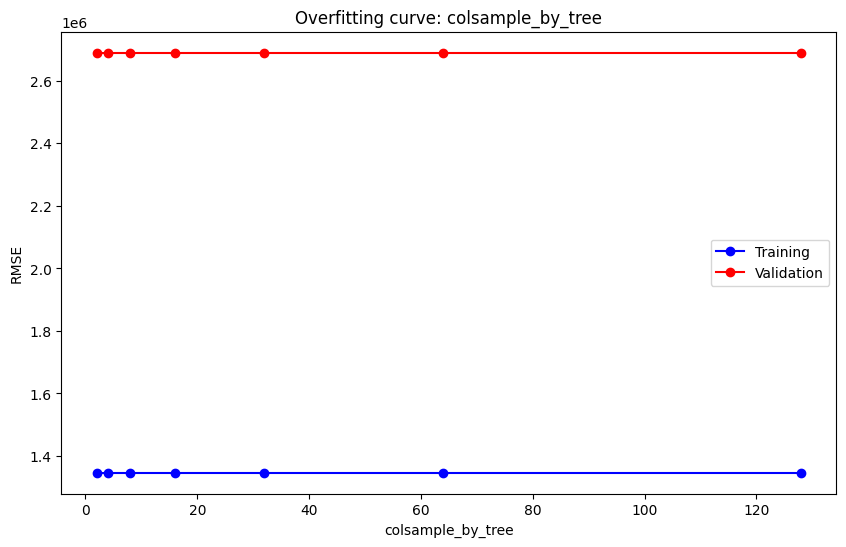

In [ ]:
test_param_and_plot_xgb('colsample_by_tree', [2, 4, 8, 16, 32, 64, 128])

train rmse is: 8618666.40055929, val rmse is: 8414660.333379451, train acc is : -2.2006901613499887, val acc is : -2.3085621866183685
train rmse is: 2197884.817363552, val rmse is: 2750887.0774191213, train acc is : 0.7918514686649074, val acc is : 0.6464004949486556
train rmse is: 1974255.3679961986, val rmse is: 2693004.3606015383, train acc is : 0.8320538130764941, val acc is : 0.6611244500765747
train rmse is: 1857619.5831891827, val rmse is: 2682070.7496001637, train acc is : 0.8513116115133523, val acc is : 0.6638705369859041
train rmse is: 1760927.2419479417, val rmse is: 2673986.0316763585, train acc is : 0.8663877377723057, val acc is : 0.6658939109924741
train rmse is: 1698554.9559743756, val rmse is: 2681238.4893250307, train acc is : 0.8756852392165426, val acc is : 0.664079110004283
train rmse is: 1612412.153146898, val rmse is: 2685875.9987061806, train acc is : 0.8879748281800118, val acc is : 0.6629160776868559
train rmse is: 1538966.415335358, val rmse is: 2680767.7687

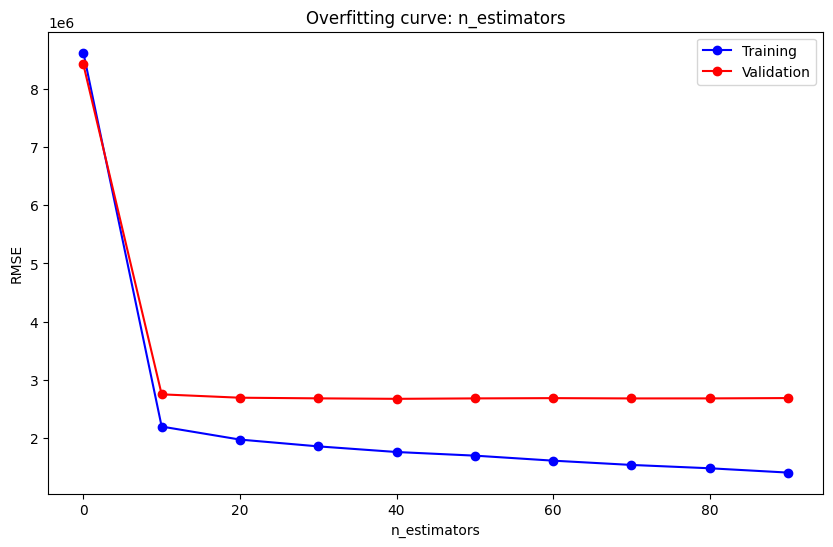

In [ ]:
test_param_and_plot_xgb('n_estimators', [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

train rmse is: 3027707.311047517, val rmse is: 2873910.9062651456, train acc is : 0.6050052966626236, val acc is : 0.6140662822607814
train rmse is: 2566618.778226095, val rmse is: 2603885.2732973862, train acc is : 0.7161517456393286, val acc is : 0.6831820256692871
train rmse is: 2231102.624084605, val rmse is: 2555000.187481959, train acc is : 0.7855122038308516, val acc is : 0.6949661791326129
train rmse is: 1936342.423145005, val rmse is: 2548012.315149627, train acc is : 0.8384422434037617, val acc is : 0.6966324197477691
train rmse is: 1652123.05842115, val rmse is: 2636070.6924454747, train acc is : 0.8823889091279891, val acc is : 0.6753015409953711
train rmse is: 1347083.2052121446, val rmse is: 2689436.0443302183, train acc is : 0.9218097978170089, val acc is : 0.6620218968332156
train rmse is: 1078224.9772807222, val rmse is: 2682684.3856827794, train acc is : 0.9499063970483659, val acc is : 0.6637167119889988
train rmse is: 719681.4649276297, val rmse is: 2708373.51719048

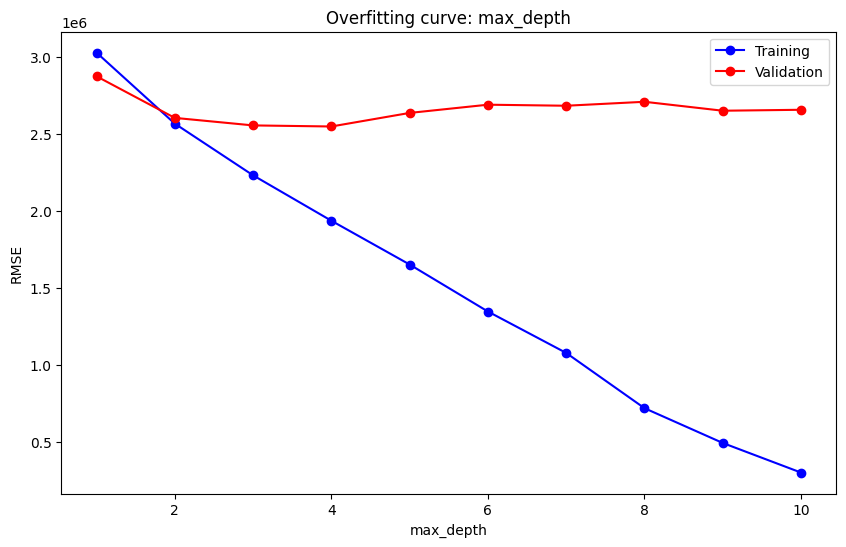

In [ ]:
test_param_and_plot_xgb('max_depth', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
test_params_xgb(n_estimators = 200, max_depth = 4, learning_rate = 0.06, subsample = 0.9)

train rmse is: 2202347.6463917205, val rmse is: 2526371.1901863315, train acc is : 0.7910053147599992, val acc is : 0.7017637414320397


(2202347.6463917205,
 2526371.1901863315,
 0.7910053147599992,
 0.7017637414320397)

In [ ]:
test_params_xgb(n_estimators = 200, max_depth = 4, learning_rate = 0.2, subsample = 0.9)

train rmse is: 1794269.447276518, val rmse is: 2500492.276936223, train acc is : 0.8612800840360267, val acc is : 0.7078424209436438


(1794269.447276518, 2500492.276936223, 0.8612800840360267, 0.7078424209436438)

In [ ]:
test_params_xgb(n_estimators = 200, max_depth = 4, learning_rate = 0.2, subsample = 0.5)

train rmse is: 1867480.1884749744, val rmse is: 2636149.802828103, train acc is : 0.849728888282976, val acc is : 0.6752820518330755


(1867480.1884749744, 2636149.802828103, 0.849728888282976, 0.6752820518330755)

In [ ]:
test_preds_xgb = xg_model.predict(test_prices[all_cols])

In [ ]:
generate_submission(test_preds_xgb, 'xgb_submission.csv')

In [ ]:
test_params_xgb(n_estimators = 100, max_depth = 4, learning_rate = 0.2, subsample = 0.9, reg_lambda = 70)

train rmse is: 2296075.052564288, val rmse is: 2522513.887316046, train acc is : 0.7728380162029662, val acc is : 0.7026737497204741


(2296075.052564288, 2522513.887316046, 0.7728380162029662, 0.7026737497204741)

In [ ]:
test_preds_xgb2 = xg_model.predict(test_prices[all_cols])

In [ ]:
generate_submission(test_preds_xgb2, 'xgb_submission2.csv')

In [ ]:
test_preds_xgb2[test_preds_xgb2 < 0] = np.mean(test_preds_xgb2[test_preds_xgb2 > 0])

In [ ]:
test_preds_xgb2[test_preds_xgb2 < 0]

array([], dtype=float32)

In [ ]:
generate_submission(test_preds_xgb2, 'xgb_submission5.csv')